In [22]:
import numpy as np
import tensorflow
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout, GlobalAveragePooling2D

In [24]:
bil = np.load('Alhaiya_Bilawal_mel_spec_imagedata_600.npy', allow_pickle=True, encoding='bytes')
mal = np.load('Malkauns_mel_spec_imagedata_600.npy', allow_pickle=True, encoding='bytes')

In [25]:
dataset = np.concatenate((bil, mal), axis=0)
n = len(dataset)

In [26]:
n

1200

In [7]:
# dataset

array([[array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 25

In [27]:
x = dataset[:, :-1]
y = dataset[:, -1]

In [28]:
y

array(['alahaiya_bilaval', 'alahaiya_bilaval', 'alahaiya_bilaval', ...,
       'Malkauns', 'Malkauns', 'Malkauns'], dtype=object)

In [29]:
g = []
for i in range(n):
    a=x[i][0]
    g.append(a)

In [30]:
g = np.array(g)

In [31]:
g.shape

(1200, 576, 720, 3)

In [32]:
import category_encoders as ce
enc = ce.OneHotEncoder(y, handle_unknown='return_nan', return_df=True, use_cat_names=True)

In [33]:
y_en = enc.fit_transform(y)

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(g, y_en, test_size=0.2, random_state=0)

In [35]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((960, 576, 720, 3), (960, 2), (240, 576, 720, 3), (240, 2))

In [36]:
cnn = Sequential()

cnn.add(Conv2D(50, kernel_size=(3,3), strides=(3,3), padding='same', activation='relu', input_shape=(576, 720, 3)))

cnn.add(Conv2D(75, kernel_size=(3,3), strides=(3,3), padding='same', activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(105, kernel_size=(3,3), strides=(3,3), padding='same', activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(150, kernel_size=(3,3), strides=(3,3), padding='same', activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(190, kernel_size=(3,3), strides=(3,3), padding='same', activation='relu'))
# cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(240, kernel_size=(3,3), strides=(3,3), padding='same', activation='relu'))
# cnn.add(MaxPool2D(pool_size=(2,2)))

cnn.add(Conv2D(300, kernel_size=(3,3), strides=(3,3), padding='same', activation='relu'))
# cnn.add(MaxPool2D(pool_size=(2,2)))

cnn.add(GlobalAveragePooling2D())
# cnn.add(Flatten())

cnn.add(Dense(150, activation='relu'))
cnn.add(Dropout(0.4))
cnn.add(Dense(80, activation='relu'))
cnn.add(Dropout(0.3))


cnn.add(Dense(2, activation='sigmoid'))

In [37]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 192, 240, 50)      1400      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 80, 75)        33825     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 40, 75)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 40, 75)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 14, 105)       70980     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 7, 105)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 7, 105)         0

In [38]:
cnn.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [39]:
cnn.fit(x_train, y_train, batch_size=8, epochs=10, validation_data=(x_test, y_test), verbose=1)

Epoch 1/10
120/120 [==============================] - 198s 2s/step - loss: 0.7040 - accuracy: 0.4531 - val_loss: 0.6938 - val_accuracy: 0.4583
Epoch 2/10
120/120 [==============================] - 105s 876ms/step - loss: 0.6933 - accuracy: 0.5073 - val_loss: 0.6931 - val_accuracy: 0.4583
Epoch 3/10
120/120 [==============================] - 98s 819ms/step - loss: 0.6947 - accuracy: 0.4927 - val_loss: 0.6940 - val_accuracy: 0.4583
Epoch 4/10
120/120 [==============================] - 100s 834ms/step - loss: 0.6916 - accuracy: 0.5104 - val_loss: 0.6872 - val_accuracy: 0.6875
Epoch 5/10
120/120 [==============================] - 99s 829ms/step - loss: 0.6883 - accuracy: 0.5302 - val_loss: 0.6837 - val_accuracy: 0.4583
Epoch 6/10
120/120 [==============================] - 97s 810ms/step - loss: 0.6153 - accuracy: 0.6958 - val_loss: 0.6218 - val_accuracy: 0.5292
Epoch 7/10
120/120 [==============================] - 96s 801ms/step - loss: 0.2209 - accuracy: 0.9333 - val_loss: 0.0028 - val_ac

In [41]:
train_loss_10=[0.7040, 0.6933, 0.6947, 0.6916, 0.6883, 0.6153, 0.2209, 0.2417, 0.0456, 0.0516]
val_loss_10=[0.6938, 0.6931, 0.6940, 0.6872, 0.6837, 0.6218, 0.0028, 0.1722, 0.00042702, 0.0012]
epochs_10=[1,2,3,4,5,6,7,8,9,10]

Text(0.5, 1.0, 'epochs_10 vs train_loss for 10 epochs')

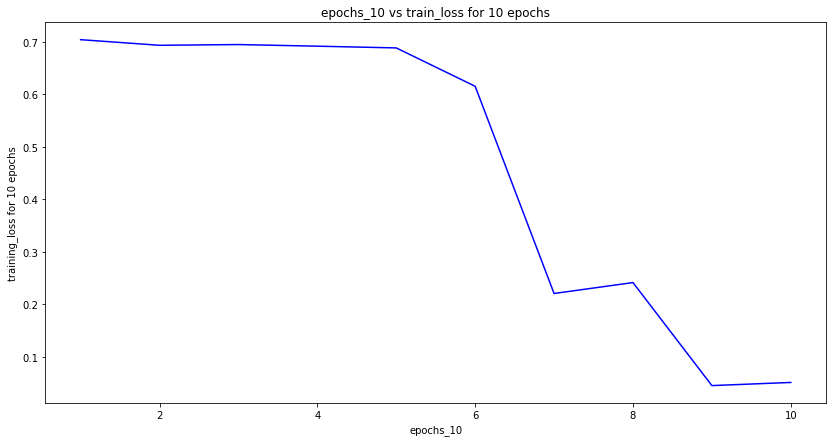

In [42]:
plt.figure(figsize=(14,7))
plt.plot(epochs_10, train_loss_10, color='blue')
plt.xlabel('epochs_10')
plt.ylabel('training_loss for 10 epochs')
plt.title('epochs_10 vs train_loss for 10 epochs')

Text(0.5, 1.0, 'epochs_10 vs validation_loss for 10 epochs')

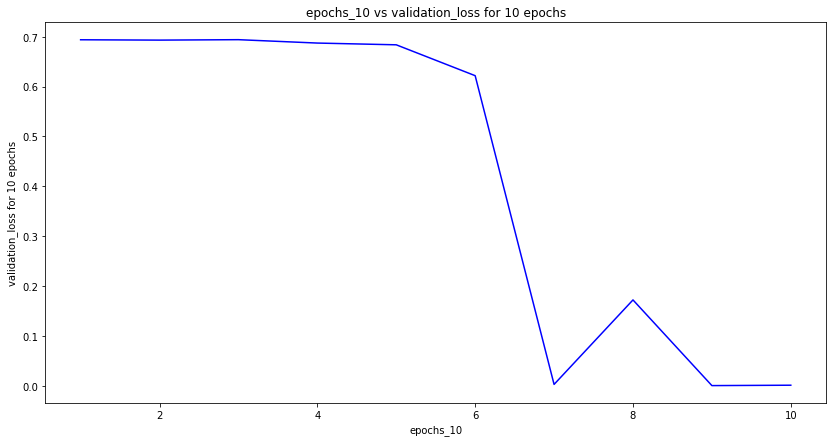

In [46]:
plt.figure(figsize=(14,7))
plt.plot(epochs_10, val_loss_10, color='blue')
plt.xlabel('epochs_10')
plt.ylabel('validation_loss for 10 epochs')
plt.title('epochs_10 vs validation_loss for 10 epochs')

Text(0.5, 1.0, 'validation_loss vs train_loss for 10 epochs')

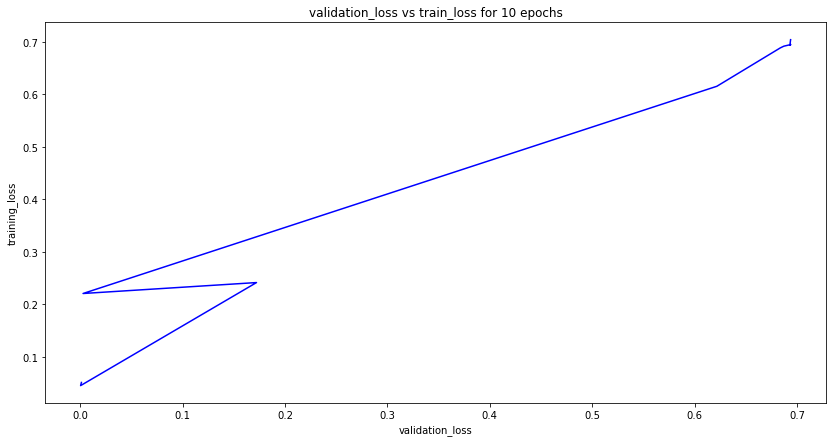

In [45]:
plt.figure(figsize=(14,7))
plt.plot(val_loss_10, train_loss_10, color='blue')
plt.xlabel('validation_loss')
plt.ylabel('training_loss')
plt.title('validation_loss vs train_loss for 10 epochs')

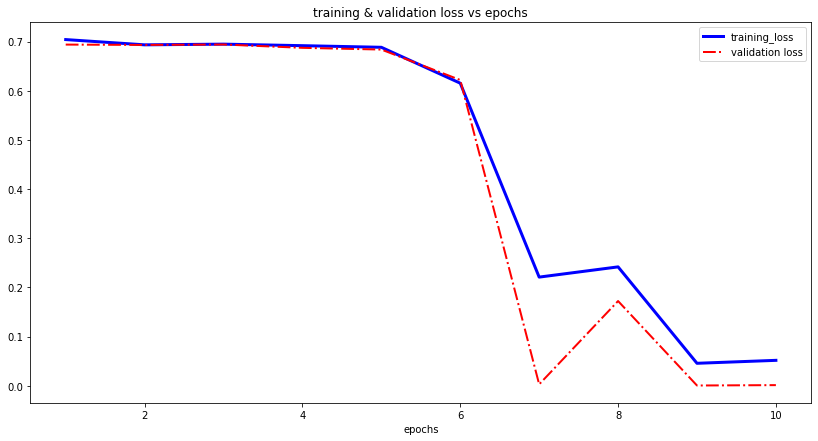

In [49]:
plt.figure(figsize=(14,7))
plt.plot(epochs_10, train_loss_10, color='blue', label='training_loss', linestyle='solid', linewidth=3)
plt.plot(epochs_10, val_loss_10, color='red', label='validation loss', linestyle='dashdot', linewidth=2)
plt.xlabel('epochs')
plt.title('training & validation loss vs epochs')
plt.legend()
plt.show()

In [52]:
y=[0,0,0,0,0,0,0,0,0,0]

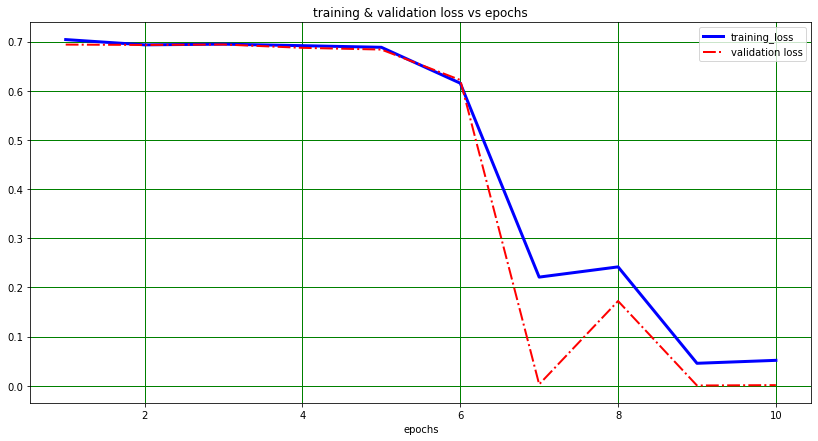

In [55]:
plt.figure(figsize=(14,7))
plt.plot(epochs_10, train_loss_10, color='blue', label='training_loss', linestyle='solid', linewidth=3)
plt.plot(epochs_10, val_loss_10, color='red', label='validation loss', linestyle='dashdot', linewidth=2)
plt.grid(color='green', linestyle='solid', linewidth=1)
plt.xlabel('epochs')
plt.title('training & validation loss vs epochs')
plt.legend()
plt.show()

In [20]:
cnn.fit(x_train, y_train, batch_size=8, epochs=100, validation_data=(x_test, y_test), verbose=1)

Epoch 1/100
120/120 [==============================] - 123s 1s/step - loss: 0.7083 - accuracy: 0.4771 - val_loss: 0.6922 - val_accuracy: 0.4583
Epoch 2/100
120/120 [==============================] - 97s 812ms/step - loss: 0.6954 - accuracy: 0.4990 - val_loss: 0.6914 - val_accuracy: 0.4583
Epoch 3/100
120/120 [==============================] - 101s 840ms/step - loss: 0.6905 - accuracy: 0.5250 - val_loss: 0.6884 - val_accuracy: 0.4583
Epoch 4/100
120/120 [==============================] - 147s 1s/step - loss: 0.6614 - accuracy: 0.6313 - val_loss: 0.5047 - val_accuracy: 0.9833
Epoch 5/100
120/120 [==============================] - 105s 873ms/step - loss: 0.3030 - accuracy: 0.8948 - val_loss: 1.6151 - val_accuracy: 0.4583
Epoch 6/100
120/120 [==============================] - 108s 902ms/step - loss: 0.1084 - accuracy: 0.9708 - val_loss: 3.1057e-04 - val_accuracy: 1.0000
Epoch 7/100
120/120 [==============================] - 112s 932ms/step - loss: 0.2982 - accuracy: 0.8687 - val_loss: 0.59

120/120 [==============================] - 208s 2s/step - loss: 0.0518 - accuracy: 1.0000 - val_loss: 0.0401 - val_accuracy: 1.0000
Epoch 57/100
120/120 [==============================] - 210s 2s/step - loss: 0.0348 - accuracy: 1.0000 - val_loss: 0.0273 - val_accuracy: 1.0000
Epoch 58/100
120/120 [==============================] - 208s 2s/step - loss: 0.0257 - accuracy: 1.0000 - val_loss: 0.0189 - val_accuracy: 1.0000
Epoch 59/100
120/120 [==============================] - 216s 2s/step - loss: 0.0195 - accuracy: 1.0000 - val_loss: 0.0138 - val_accuracy: 1.0000
Epoch 60/100
120/120 [==============================] - 209s 2s/step - loss: 0.0139 - accuracy: 1.0000 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 61/100
120/120 [==============================] - 210s 2s/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 62/100
120/120 [==============================] - 213s 2s/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.0055 - val_accuracy: 1.000

In [2]:
train_loss=[0.7083, 0.6954, 0.6905, 0.6614, 0.3030, 0.1084, 0.2982, 0.1992, 0.1478, 0.0059, 0.0018, 0.0013, 0.00088888, 0.00064446, 0.0003802, 0.00045103, 0.00025094, 1.1817, 0.6414, 0.3653, 0.2834, 0.5870, 0.7015, 0.5269, 0.6259, 0.3930, 0.6250, 0.6479, 0.5712, 0.4971, 0.5435, 0.4269, 0.4942, 0.1046, 0.0098, 0.0022, 0.0810, 0.0032, 0.0020, 0.00073834, 0.5125, 0.2557, 0.1284, 0.0081, 0.0024, 0.0012, 0.00071171, 0.00060199, 0.00070717, 0.00054746, 0.00037328, 0.2367, 0.3704, 0.1141, 0.0744, 0.0518, 0.0348, 0.0257, 0.0195, 0.0139, 0.0085, 0.0069, 0.0048, 0.0020, 0.0013, 0.0012, 0.00069128, 0.00062634, 0.00040560, 0.0016, 0.00056775, 0.00066200, 0.00036846, 2.0019, 0.7298, 0.7112, 0.6998, 0.6995, 0.6950, 0.6934, 0.6851, 0.5476, 0.5132, 0.4128, 0.1401, 0.0280, 0.0099, 0.0571, 0.0036, 0.0028, 0.00081701, 0.0010, 0.0018, 0.0014, 0.0057, 0.0048, 0.0015, 0.00053747, 0.00099518, 0.00059470]

In [3]:
len(train_loss)

100

In [6]:
val_loss=[0.6922, 0.6914, 0.6884, 0.5047, 1.6151, 0.00031057, 0.5983, 0.0013, 0.0017, 0.00011944, 0.000024750, 0.0000080441, 0.0000054597, 0.0000030846, 0.0000024389, 0.0000014119, 0.00000091535, 0.6860, 0.4272, 0.2690, 0.2045, 0.7137, 0.6959, 0.2815, 0.1200, 0.0338, 0.7003, 0.6086, 0.5563, 0.2719, 0.5617, 0.1409, 0.3257, 0.0037, 0.00056940, 0.00017428, 0.0010, 0.00020528, 0.00011007, 0.000059480, 0.3919, 0.0261, 0.0141, 0.00081492, 0.00012881, 0.00018891, 0.000025012, 0.000036512, 0.000025609, 0.000032693, 0.000036051, 1.3374, 0.1483, 0.0885, 0.0599, 0.0401, 0.0273, 0.0189, 0.0138, 0.0098, 0.0037, 0.0055, 0.0013, 0.00044574, 0.00024085, 0.00019453, 0.000082124, 0.00011438, 0.000058148, 0.00010274, 0.000047889, 0.000058350, 0.000022408, 0.7076, 0.6898, 0.6895, 0.6910, 0.6918, 0.6914, 0.6694, 0.6337, 0.2490, 0.7350, 0.4879, 0.0012, 0.00015758, 0.000031497, 0.00018108, 0.000011496, 0.000014063, 0.0000041484, 0.0000017624, 0.00000095518, 0.00000055286, 0.00010067, 0.0000043546, 0.0000012701, 0.00000054236, 0.00000029036, 0.00000018615]

In [56]:
len(val_loss)

100

In [9]:
epochs=[]
for i in range(1,101):
    epochs.append(i)

In [12]:
print(epochs)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [8]:
import matplotlib.pyplot as plt

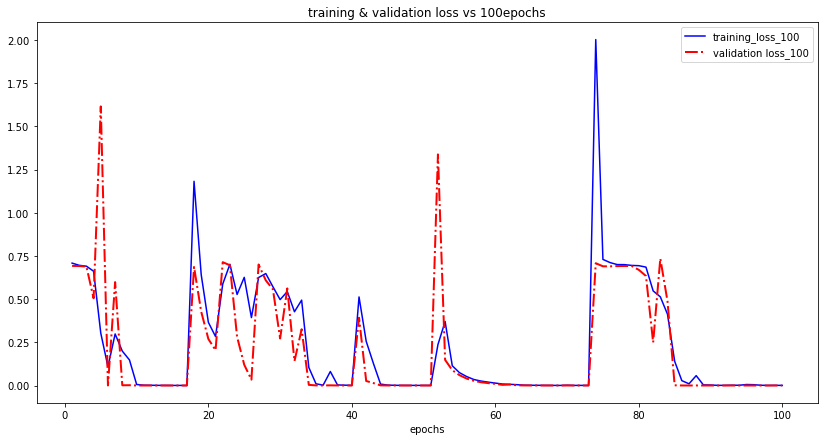

In [51]:
plt.figure(figsize=(14,7))
plt.plot(epochs, train_loss, color='blue', label='training_loss_100', linestyle='solid', linewidth=1.5)
plt.plot(epochs, val_loss, color='red', label='validation loss_100', linestyle='dashdot', linewidth=2)
plt.xlabel('epochs')
plt.title('training & validation loss vs 100epochs')
plt.legend()
plt.show()

Text(0.5, 1.0, 'epochs vs train_loss')

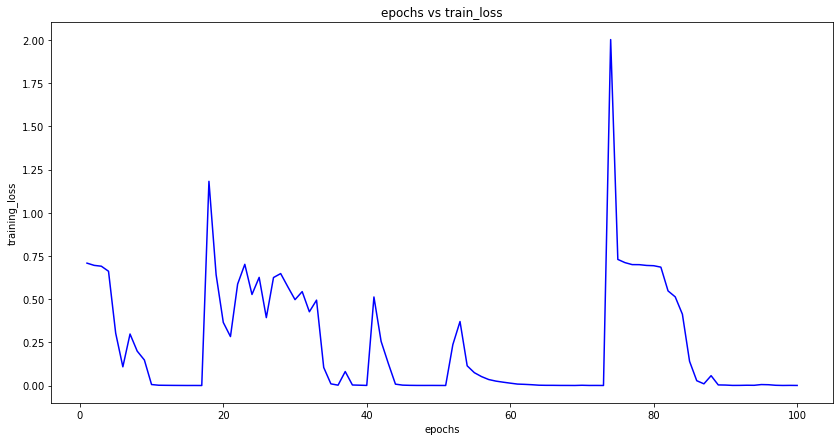

In [19]:
plt.figure(figsize=(14,7))
plt.plot(epochs, train_loss, color='blue')
plt.xlabel('epochs')
plt.ylabel('training_loss')
plt.title('epochs vs train_loss')

Text(0.5, 1.0, 'epochs vs validation_loss')

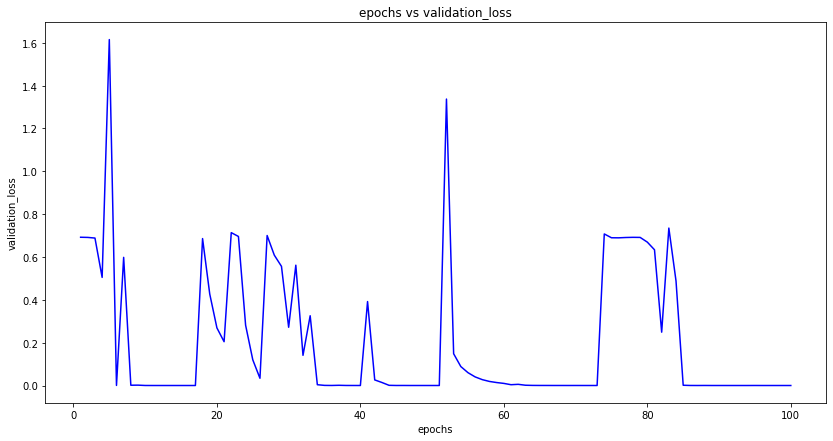

In [20]:
plt.figure(figsize=(14,7))
plt.plot(epochs, val_loss, color='blue')
plt.xlabel('epochs')
plt.ylabel('validation_loss')
plt.title('epochs vs validation_loss')

Text(0.5, 1.0, 'validation_loss vs train_loss')

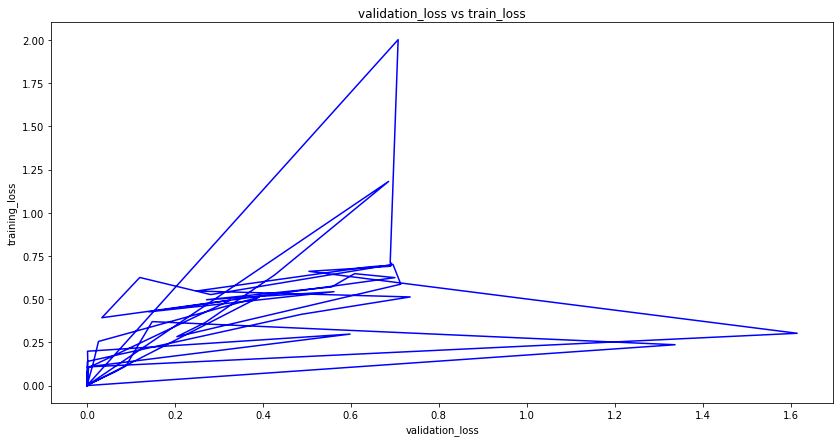

In [21]:
plt.figure(figsize=(14,7))
plt.plot(val_loss, train_loss, color='blue')
plt.xlabel('validation_loss')
plt.ylabel('training_loss')
plt.title('validation_loss vs train_loss')